# Problema do Caixeiro Viajante
## 1. Solução Inicial

***
### Inicialização

In [1]:
# Biliotecas padrão
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Bibliotecas do projeto
import src.construcao as construcao
import src.utils as utils


# Parametros
arquivo = 'data/c50.txt'
nome_index = 'index'
nome_coord_x = 'coord_x'
nome_coord_y = 'coord_y'

# Carrega dados
df_cidades = utils.carrega_dados(arquivo, nome_index, nome_coord_x, nome_coord_y)

# Calcula quantidade de cidades
n = len(df_cidades)

# Gera matriz de distancias
d = utils.calc_distancias(df_cidades, nome_index, nome_coord_x, nome_coord_y)

# Converter DataFrame para array NumPy
cidades = df_cidades[['coord_x', 'coord_y']].values


***
## Solução Inicial
### Aleatória

In [2]:
# Inicia contagem de tempo da construção da solução
inicio_contagem_tempo = time.time()

s = [] 

# Inicio Metodo - Solução Inicial Aleatória
cidade_visitada = []

# Seleciona uma cidade inicial aleatória
cidade_inicial = np.random.randint(n)
cidade_visitada.append(cidade_inicial)

# Cria uma lista de cidades não visitadas
cidade_nao_visitada = list(range(n))
cidade_nao_visitada.remove(cidade_inicial)

# Construção aleatória
cidade_atual = cidade_inicial
while cidade_nao_visitada:
    proxima_cidade = np.random.choice(cidade_nao_visitada)
    cidade_visitada.append(proxima_cidade)
    cidade_nao_visitada.remove(proxima_cidade)
    cidade_atual = proxima_cidade

# Fecha percurso retornando à cidade inicial
cidade_visitada.append(cidade_inicial)

s = cidade_visitada
# Fim Método

# Encerra contagem de tempo da construção
fim_contagem_tempo = time.time()
print(f'Foram gastos {round(fim_contagem_tempo - inicio_contagem_tempo, 4)} segundos na construção dessa solução')

fo = utils.calcula_fo(n, s, d)
print("\nSolucao construida de forma aleatoria:")

utils.imprime_rota(s, n)

print(f"\n\nFuncao objetivo = {round(fo, 4)}")

Foram gastos 0.0012 segundos na construção dessa solução

Solucao construida de forma aleatoria:
2 -> 20 -> 27 -> 26 -> 50 -> 37 -> 9 -> 1 -> 10 -> 25 -> 34 -> 35 -> 48 -> 45 -> 18 -> 41 -> 5 -> 44 -> 16 -> 39 -> 8 -> 42 -> 36 -> 31 -> 3 -> 30 -> 11 -> 47 -> 24 -> 6 -> 29 -> 0 -> 12 -> 17 -> 28 -> 23 -> 14 -> 21 -> 33 -> 38 -> 15 -> 32 -> 13 -> 7 -> 46 -> 49 -> 40 -> 22 -> 4 -> 43 -> 19 -> 2

Funcao objetivo = 1635.8586


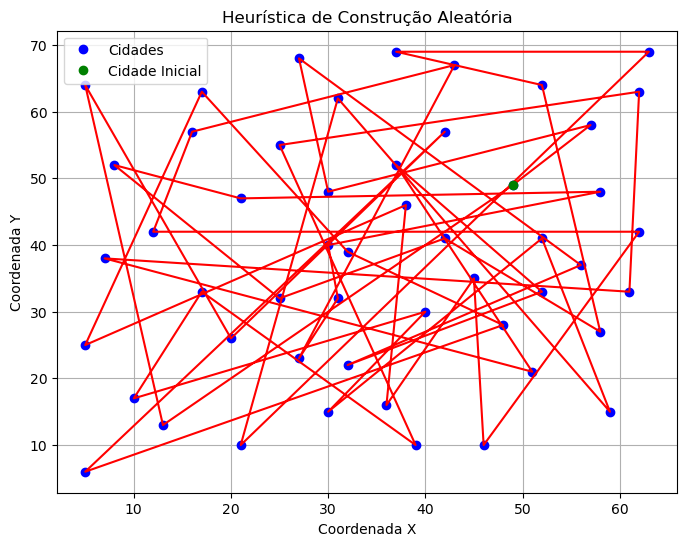

In [3]:
# Plota o percurso
plt.figure(figsize=(8, 6))
plt.plot(cidades[:, 0], cidades[:, 1], 'bo', label='Cidades')
plt.plot(cidades[s, 0], cidades[s, 1], 'r-')
plt.plot(cidades[s[0], 0], cidades[s[0], 1], 'go', label='Cidade Inicial')
plt.legend()
plt.title(f'Heurística de Construção Aleatória')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid()
plt.show()


***
### Guloso Vizinho mais Próximo

In [4]:
# Inicia contagem de tempo da construção da solução
inicio_contagem_tempo = time.time()


# Inicio Método - Guloso Vizinho Mais Proximo
visitados = set()
s = []

# Escolher uma cidade inicial aleatoriamente
cidade_inicial = np.random.choice(n)
s.append(cidade_inicial)
visitados.add(cidade_inicial)

# Construção da solução
while len(s) < n:
    cidade_atual = s[-1]
    proxima_cidade = None
    menor_distancia = float('inf')
    
    # Encontrar a cidade mais próxima ainda não visitada
    for cidade in range(n):
        # Se a cidade não foi visitada e a distância entre a cidade atual e essa cidade é menor que menor_distancia, atualizamos proxima_cidade e menor_distancia.
        if (cidade not in visitados) and (d[cidade_atual][cidade] < menor_distancia):
            menor_distancia = d[cidade_atual][cidade]
            proxima_cidade = cidade
    
    s.append(proxima_cidade)
    visitados.add(proxima_cidade)

# Fecha circuito de cidades
s.append(cidade_inicial)
# Fim Método

# Encerra contagem de tempo da construção
fim_contagem_tempo = time.time()
print(f'Foram gastos {round(fim_contagem_tempo - inicio_contagem_tempo, 4)} segundos na construção dessa solução')

fo = utils.calcula_fo(n, s, d)
print("\nSolucao construida de forma aleatoria:")

utils.imprime_rota(s, n)

print(f"\n\nFuncao objetivo = {round(fo, 4)}")

Foram gastos 0.0116 segundos na construção dessa solução

Solucao construida de forma aleatoria:
38 -> 11 -> 32 -> 1 -> 22 -> 28 -> 31 -> 8 -> 26 -> 7 -> 23 -> 48 -> 27 -> 0 -> 46 -> 12 -> 47 -> 4 -> 17 -> 37 -> 15 -> 44 -> 42 -> 19 -> 41 -> 13 -> 25 -> 14 -> 6 -> 24 -> 43 -> 18 -> 5 -> 49 -> 9 -> 50 -> 16 -> 2 -> 29 -> 21 -> 34 -> 30 -> 10 -> 39 -> 33 -> 45 -> 40 -> 20 -> 35 -> 36 -> 3 -> 38

Funcao objetivo = 536.8362


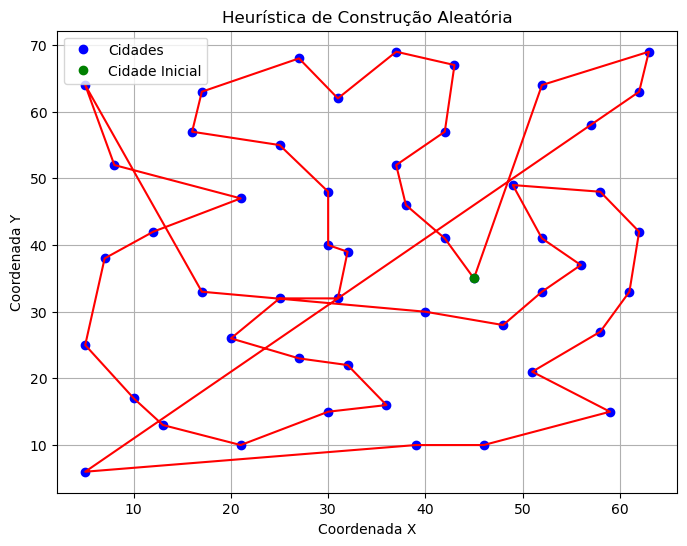

In [5]:
# Plota o percurso
plt.figure(figsize=(8, 6))
plt.plot(cidades[:, 0], cidades[:, 1], 'bo', label='Cidades')
plt.plot(cidades[s, 0], cidades[s, 1], 'r-')
plt.plot(cidades[s[0], 0], cidades[s[0], 1], 'go', label='Cidade Inicial')
plt.legend()
plt.title(f'Heurística de Construção Aleatória')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid()
plt.show()
